In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50)

batch_size = 40
train_generator = train_datagen.flow_from_directory(
    "C:/Users/Malini/Desktop/aug",
    target_size=(160,160), 
    color_mode='rgb', 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=True)




Found 3200 images belonging to 2 classes.


In [3]:
class_dictionary = train_generator.class_indices
#---create a dictionary of labels---
class_dictionary = { value:key for key,value in
    class_dictionary.items()}
#---convert the dictionary to a list---
class_list = [value for _,value in class_dictionary.items()]
print(class_list)

['cat', 'dog']


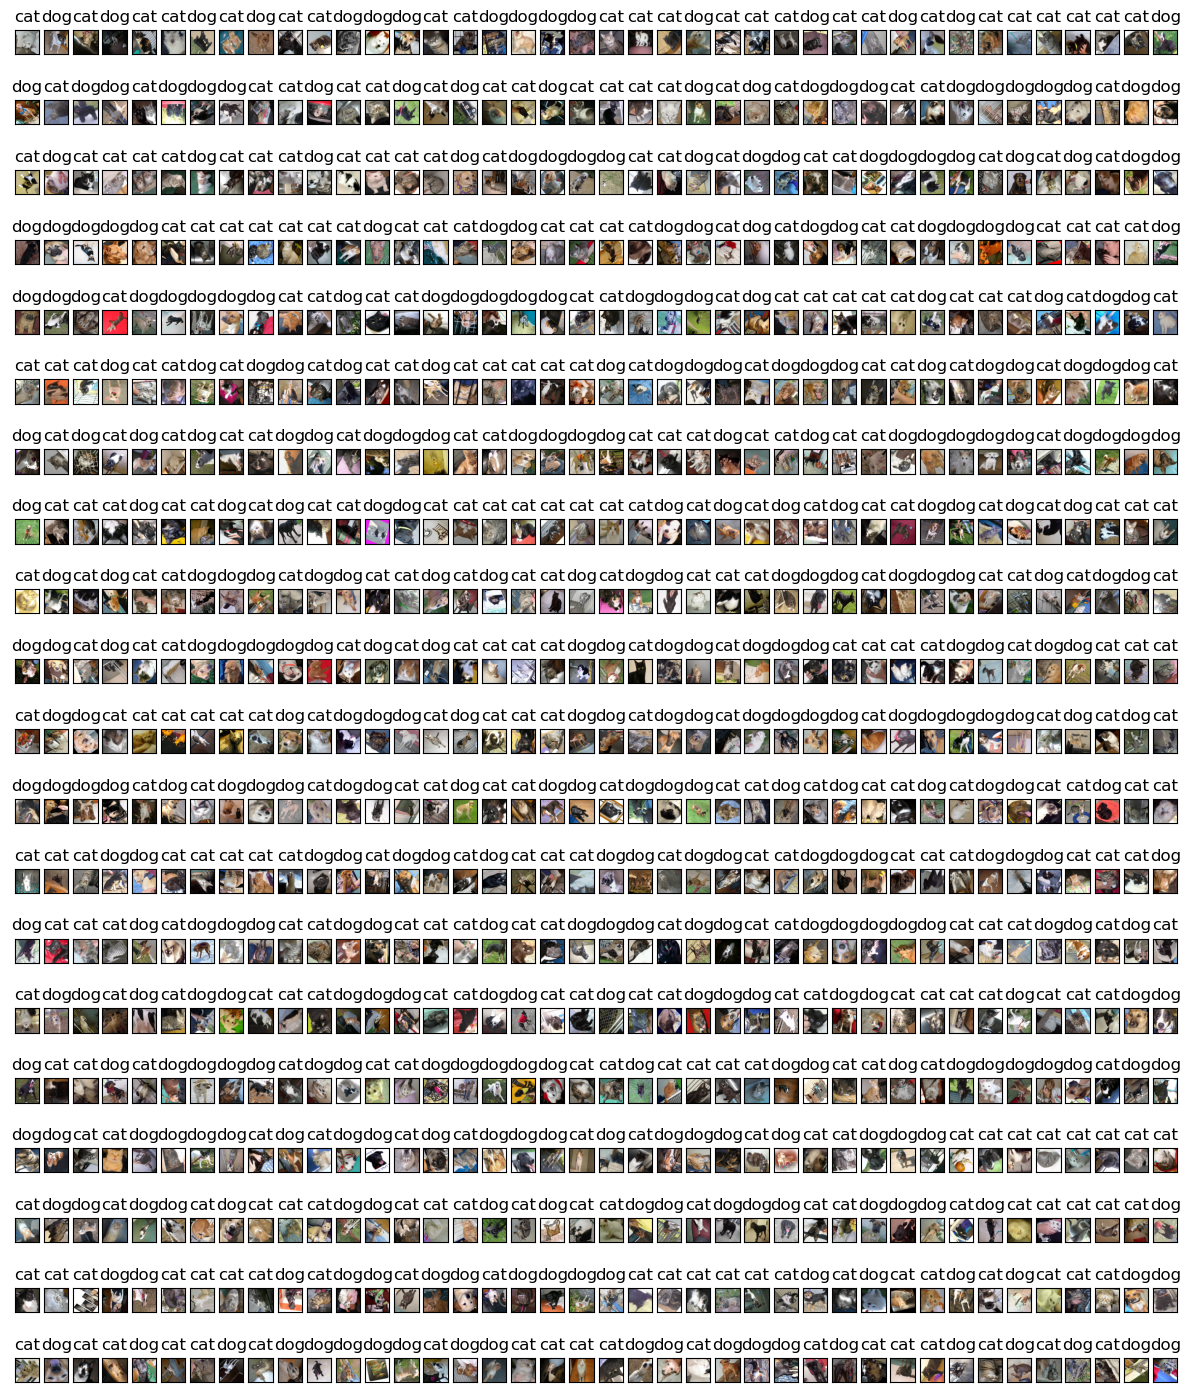

In [4]:
rows = 20
fig, axes = plt.subplots(rows,batch_size)
for r in range(rows):    
    #---get the batch of augmented images---
    image_batch = train_generator.next()    
    #---get the number of images returned---
    images_count = image_batch[0].shape[0]
    
    for c in range(images_count):
        #---convert to unsigned integers for viewing---
        image = image_batch[0][c].astype('uint8')
        
        #---display the image---
        axes[r,c].imshow(image)
        #---display the label of the image---
        axes[r,c].title.set_text(
            class_list[np.argmax(image_batch[1][c])])
        #---hides the x and y-ticks---
        axes[r,c].set_xticks([])
        axes[r,c].set_yticks([])
fig.set_size_inches(15,18)